<a href="https://colab.research.google.com/github/Xin-overclocked/WIA1006_ML/blob/main/Transportation_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import math

from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Acquire Dataset

In [35]:
!git clone https://github.com/Xin-overclocked/WIA1006_ML.git

fatal: destination path 'WIA1006_ML' already exists and is not an empty directory.


In [36]:
data = pd.read_csv('/content/WIA1006_ML/Fuel2015to2019.csv',encoding='utf-8')

# Data Preprocessing

In [37]:
data.head()

,Année modèle,Marque,Modèle,Catégorie de véhicule,Cylindrée (L),Cylindres,Transmission,Type de carburant,Ville (L/100 km),Route (L/100 km),Combinée (L/100 km),Combinée (mi/gal),Émissions de CO2 (g/km),Indice de CO2,Indice de smog
0,2015,Acura,ILX,Compacte,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN
1,2015,Acura,ILX,Compacte,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN
2,2015,Acura,ILX Hybrid,Compacte,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN
3,2015,Acura,MDX SH-AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN,NaN
4,2015,Acura,RDX AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN,NaN


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Année modèle             5431 non-null   int64  
 1   Marque                   5431 non-null   object 
 2   Modèle                   5431 non-null   object 
 3   Catégorie de véhicule    5431 non-null   object 
 4   Cylindrée (L)            5431 non-null   float64
 5   Cylindres                5431 non-null   int64  
 6   Transmission             5431 non-null   object 
 7   Type de carburant        5431 non-null   object 
 8   Ville (L/100 km)         5431 non-null   float64
 9   Route (L/100 km)         5431 non-null   float64
 10  Combinée (L/100 km)      5431 non-null   float64
 11  Combinée (mi/gal)        5431 non-null   int64  
 12  Émissions de CO2 (g/km)  5431 non-null   int64  
 13  Indice de CO2            4303 non-null   float64
 14  Indice de smog          

In [39]:
english_column_names = {
    'Année modèle': 'Model_Year',
    'Marque': 'Brand',
    'Modèle': 'Model',
    'Catégorie de véhicule': 'Vehicle_Category',
    'Cylindrée (L)': 'Displacement_(L)',
    'Cylindres': 'Cylinders',
    'Transmission': 'Transmission',
    'Type de carburant': 'Fuel_Type',
    'Ville (L/100 km)': 'City_(L/100 km)',
    'Route (L/100 km)': 'Highway_(L/100 km)',
    'Combinée (L/100 km)': 'Combined_(L/100 km)',
    'Combinée (mi/gal)': 'Combined_(mi/gal)',
    'Émissions de CO2 (g/km)': 'CO2_Emissions_(g/km)',
    'Indice de CO2': 'CO2_Index',
    'Indice de smog': 'Smog_Index',
}

data.rename(columns=english_column_names, inplace=True)
print(data.columns)

Index(['Model_Year', 'Brand', 'Model', 'Vehicle_Category', 'Displacement_(L)',
       'Cylinders', 'Transmission', 'Fuel_Type', 'City_(L/100 km)',
       'Highway_(L/100 km)', 'Combined_(L/100 km)', 'Combined_(mi/gal)',
       'CO2_Emissions_(g/km)', 'CO2_Index', 'Smog_Index'],
      dtype='object')


In [40]:
data.head(5)

,Model_Year,Brand,Model,Vehicle_Category,Displacement_(L),Cylinders,Transmission,Fuel_Type,City_(L/100 km),Highway_(L/100 km),Combined_(L/100 km),Combined_(mi/gal),CO2_Emissions_(g/km),CO2_Index,Smog_Index
0,2015,Acura,ILX,Compacte,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN
1,2015,Acura,ILX,Compacte,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN
2,2015,Acura,ILX Hybrid,Compacte,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN
3,2015,Acura,MDX SH-AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN,NaN
4,2015,Acura,RDX AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN,NaN


In [41]:
unique_vehicle_categories = data['Vehicle_Category'].unique()

print(unique_vehicle_categories)

['Compacte' 'Véhicule utilitaire sport : petit' 'Intermédiaire'
 'Deux places' 'Minicompacte' 'Sous-compacte' 'Familiale : petite'
 'Grande berline' 'Véhicule utilitaire sport : ordinaire'
 'Véhicule à usage spécial' 'Camionnette : petite' 'Fourgon : passager'
 'Camionnette : ordinaire' 'Fourgonnette' 'Familiale : intermédiaire']


In [42]:
translation_dict = {
    'Compacte': 'Compact',
    'Véhicule utilitaire sport : petit': 'Small SUV',
    'Intermédiaire': 'Intermediate',
    'Deux places': 'Two-seater',
    'Minicompacte': 'Subcompact',
    'Sous-compacte': 'Subcompact',
    'Familiale : petite': 'Small Family',
    'Grande berline': 'Large Sedan',
    'Véhicule utilitaire sport : ordinaire': 'Regular SUV',
    'Véhicule à usage spécial': 'Special Purpose Vehicle',
    'Camionnette : petite': 'Small Pickup Truck',
    'Fourgon : passager': 'Passenger Van',
    'Camionnette : ordinaire': 'Regular Pickup Truck',
    'Fourgonnette': 'Van',
    'Familiale : intermédiaire': 'Intermediate Family'
}

data['Vehicle_Category'] = data['Vehicle_Category'].replace(translation_dict)

# Print the unique values in the 'Vehicle Category' column after translation
print(data['Vehicle_Category'].unique())

['Compact' 'Small SUV' 'Intermediate' 'Two-seater' 'Subcompact'
 'Small Family' 'Large Sedan' 'Regular SUV' 'Special Purpose Vehicle'
 'Small Pickup Truck' 'Passenger Van' 'Regular Pickup Truck' 'Van'
 'Intermediate Family']


In [43]:
unique_fuel_type = data['Fuel_Type'].unique()
unique_fuel_type

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [44]:
data['Fuel_Type'].value_counts()

Fuel_Type
X    2678
Z    2376
E     255
D     121
N       1
Name: count, dtype: int64

In [45]:
unique_transmission = data['Transmission'].unique()
unique_transmission

array(['AS5', 'M6', 'AV7', 'AS6', 'AM7', 'AM8', 'AS9', 'AM6', 'A6', 'A8',
       'AV8', 'AS8', 'AV', 'M7', 'M5', 'A9', 'A5', 'A4', 'AS7', 'AV6',
       'A7', 'AS4', 'AM5', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [46]:
data['Transmission'].value_counts()

Transmission
AS6     1061
AS8      915
M6       684
A6       506
AM7      356
A8       317
A9       257
AS7      234
AV       199
M5       140
AM6      116
AS10     110
AV7       98
AV6       94
M7        81
A5        53
AS9       50
A7        39
AM8       39
AV8       25
A4        19
AS5       14
A10       12
AV10       6
AM9        3
AM5        2
AS4        1
Name: count, dtype: int64

In [47]:
print('--Columns and the number of missing values--')
data.isna().sum()

--Columns and the number of missing values--


Model_Year                 0
Brand                      0
Model                      0
Vehicle_Category           0
Displacement_(L)           0
Cylinders                  0
Transmission               0
Fuel_Type                  0
City_(L/100 km)            0
Highway_(L/100 km)         0
Combined_(L/100 km)        0
Combined_(mi/gal)          0
CO2_Emissions_(g/km)       0
CO2_Index               1128
Smog_Index              2234
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model_Year            5431 non-null   int64  
 1   Brand                 5431 non-null   object 
 2   Model                 5431 non-null   object 
 3   Vehicle_Category      5431 non-null   object 
 4   Displacement_(L)      5431 non-null   float64
 5   Cylinders             5431 non-null   int64  
 6   Transmission          5431 non-null   object 
 7   Fuel_Type             5431 non-null   object 
 8   City_(L/100 km)       5431 non-null   float64
 9   Highway_(L/100 km)    5431 non-null   float64
 10  Combined_(L/100 km)   5431 non-null   float64
 11  Combined_(mi/gal)     5431 non-null   int64  
 12  CO2_Emissions_(g/km)  5431 non-null   int64  
 13  CO2_Index             4303 non-null   float64
 14  Smog_Index            3197 non-null   float64
dtypes: float64(6), int64(

### One-hot encoding

In [49]:
data_encoded = pd.get_dummies(data)

In [50]:
data.shape

(5431, 15)

### Check Categorical Data / Numerical Data

In [51]:
import pandas as pd

# Assuming your DataFrame is named 'data'
unique_values_table = []

for column in data.columns:
    unique_values = data[column].unique()
    unique_values_count = len(unique_values)
    unique_values_table.append({'Feature': column, 'Unique_Values_Count': unique_values_count,})

unique_values_df = pd.DataFrame(unique_values_table)

unique_values_df

,Feature,Unique_Values_Count
0,Model_Year,5
1,Brand,41
2,Model,1357
3,Vehicle_Category,14
4,Displacement_(L),49
5,Cylinders,8
6,Transmission,27
7,Fuel_Type,5
8,City_(L/100 km),194
9,Highway_(L/100 km),126


Categorical Data


*   Brand
*   Vehicle Category
*   Cylinders
*   Fuel Type
- Transmission


In [52]:
data_cleaned = data.drop(columns=['CO2_Index', 'Smog_Index'])

# Print the first few rows of the cleaned DataFrame to verify
print(data_cleaned.head())

   Model_Year  Brand       Model Vehicle_Category  Displacement_(L)  \
0        2015  Acura         ILX          Compact               2.0   
1        2015  Acura         ILX          Compact               2.4   
2        2015  Acura  ILX Hybrid          Compact               1.5   
3        2015  Acura  MDX SH-AWD        Small SUV               3.5   
4        2015  Acura     RDX AWD        Small SUV               3.5   

   Cylinders Transmission Fuel_Type  City_(L/100 km)  Highway_(L/100 km)  \
0          4          AS5         Z              9.7                 6.7   
1          4           M6         Z             10.8                 7.4   
2          4          AV7         Z              6.0                 6.1   
3          6          AS6         Z             12.7                 9.1   
4          6          AS6         Z             12.1                 8.7   

   Combined_(L/100 km)  Combined_(mi/gal)  CO2_Emissions_(g/km)  
0                  8.3                 34         

In [53]:
# Generate descriptive statistics for the DataFrame (e.g., min, max, mean, std deviation, and quartiles).
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Model_Year,5431.0,2016.969251,1.418106,2015.0,2016.0,2017.0,2018.0,2019.0
Displacement_(L),5431.0,3.124084,1.340291,0.9,2.0,3.0,3.6,8.4
Cylinders,5431.0,5.574664,1.824908,3.0,4.0,6.0,6.0,16.0
City_(L/100 km),5431.0,12.448702,3.373358,4.2,10.0,12.0,14.4,30.6
Highway_(L/100 km),5431.0,8.953876,2.106854,4.0,7.4,8.6,10.1,20.6
Combined_(L/100 km),5431.0,10.875640,2.769807,4.1,8.9,10.5,12.5,26.1
Combined_(mi/gal),5431.0,27.640582,7.110266,11.0,23.0,27.0,32.0,69.0
CO2_Emissions_(g/km),5431.0,249.202357,57.323708,96.0,207.0,244.0,286.0,522.0
CO2_Index,4303.0,4.798048,1.643458,1.0,4.0,5.0,6.0,10.0
Smog_Index,3197.0,4.647169,1.840989,1.0,3.0,5.0,6.0,8.0


In [54]:
train,test = train_test_split(data, test_size = 0.2, random_state = 42)

In [55]:
print('The dimension of the train synthetic dataset is:', train.shape)
print('The dimension of the test synthetic dataset is:', test.shape)
print('The dimension of the orginal dataset is:', data.shape)

The dimension of the train synthetic dataset is: (4344, 15)
The dimension of the test synthetic dataset is: (1087, 15)
The dimension of the orginal dataset is: (5431, 15)


In [56]:
data.duplicated().sum()

0

# EDA

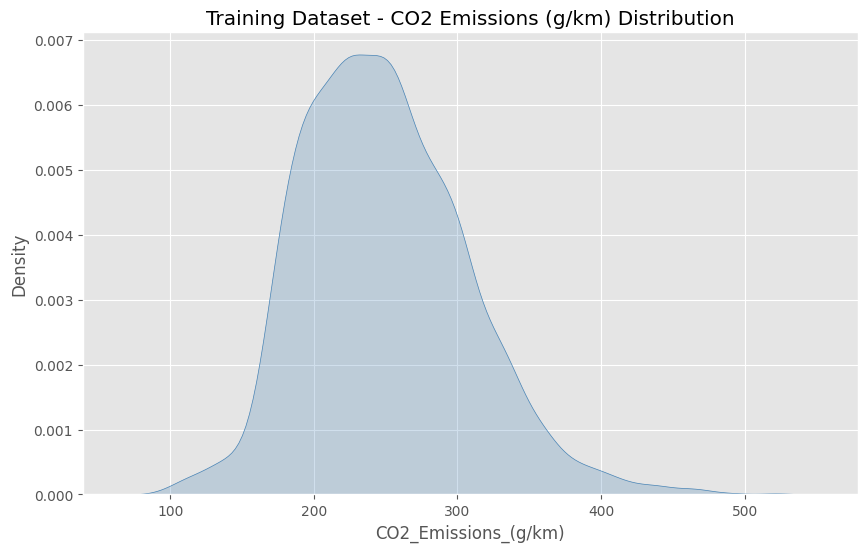

In [57]:
# Create a single plot
plt.figure(figsize=(10, 6))

# Plot the kernel density plot for the '' feature of the training dataset
sns.kdeplot(data=train, x='CO2_Emissions_(g/km)', fill=True, color='steelblue')
plt.title('Training Dataset - CO2 Emissions (g/km) Distribution')

# Show the plot
plt.show()

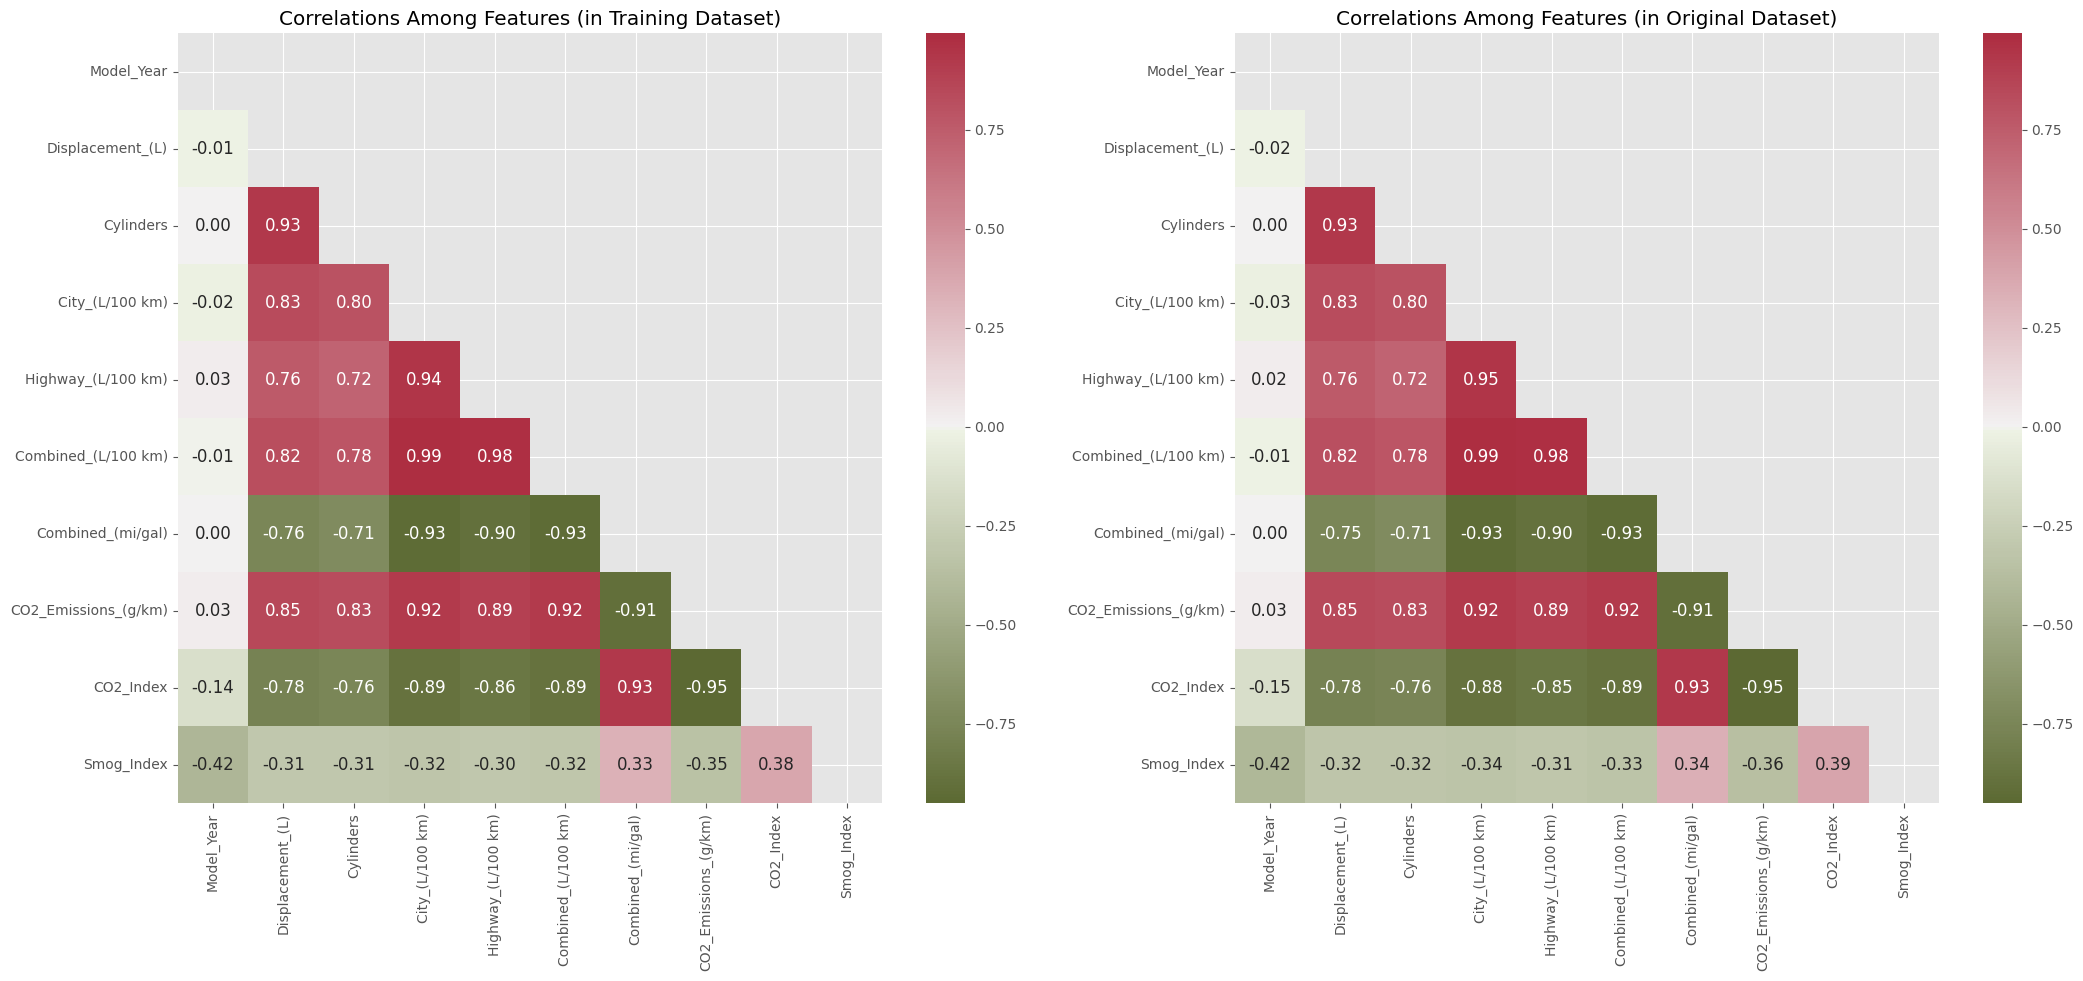

In [58]:
train_numeric = train.select_dtypes(exclude=['object'])
data_numeric = data.select_dtypes(exclude=['object'])

corr_mat_data = train_numeric.corr()
corr_mat_original = data_numeric.corr()

data_mask = np.triu(np.ones_like(corr_mat_data, dtype=bool))
original_mask = np.triu(np.ones_like(corr_mat_original, dtype=bool))

cmap = sns.diverging_palette(100, 7, s=75, l=40, n=20, center='light', as_cmap=True)

fig, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(corr_mat_data, annot=True, cmap=cmap, fmt='.2f', center=0,
            annot_kws={'size': 12}, ax=axes[0], mask=data_mask).set_title('Correlations Among Features (in Training Dataset)')
sns.heatmap(corr_mat_original, annot=True, cmap=cmap, fmt='.2f', center=0,
            annot_kws={'size': 12}, ax=axes[1], mask=original_mask).set_title('Correlations Among Features (in Original Dataset)');

Least related is model year. Most related is 'City (L/100 km)', 'Combined (L/100 km)', 'Combined (mi/gal)'.

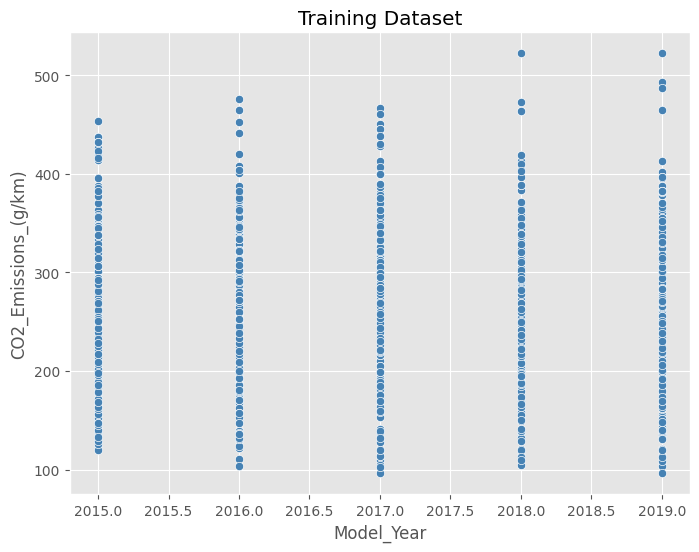

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Model_Year', y='CO2_Emissions_(g/km)', color='steelblue')
plt.title('Training Dataset')
plt.show()

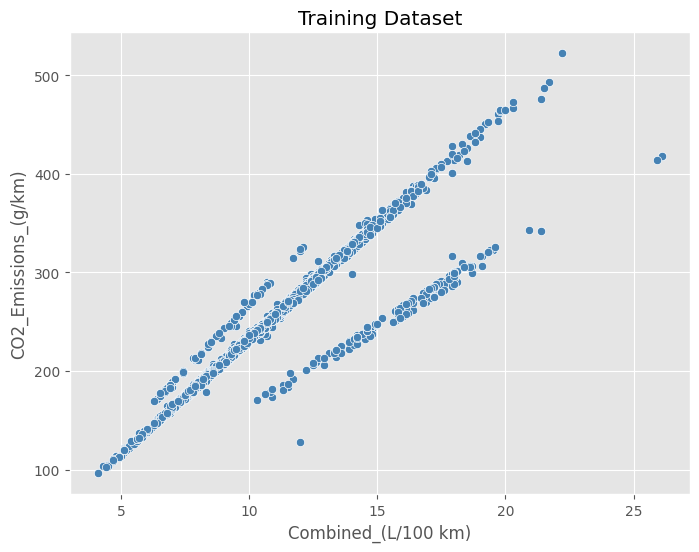

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Combined_(L/100 km)', y='CO2_Emissions_(g/km)', color='steelblue')
plt.title('Training Dataset')
plt.show()

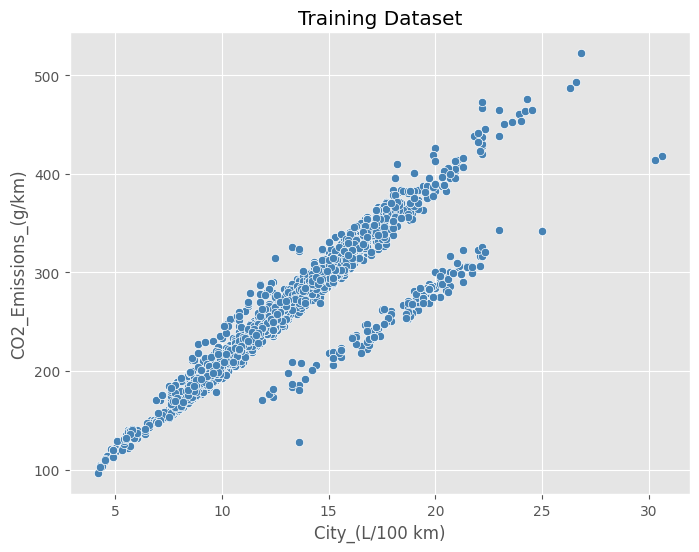

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='City_(L/100 km)', y='CO2_Emissions_(g/km)', color='steelblue')
plt.title('Training Dataset')
plt.show()

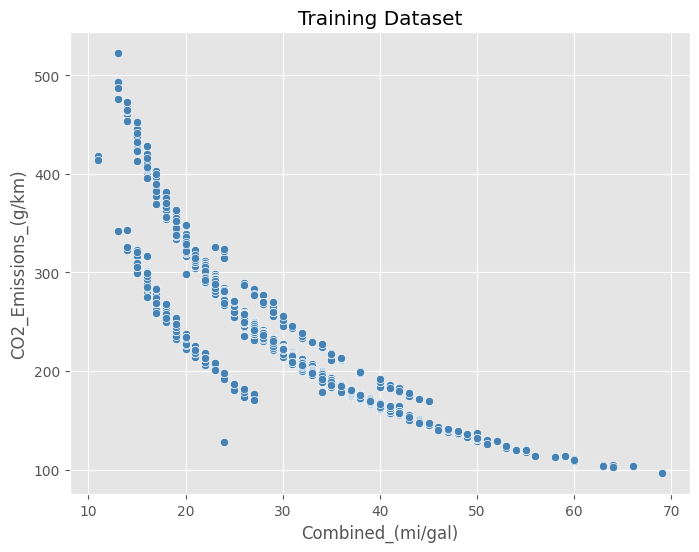

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Combined_(mi/gal)', y='CO2_Emissions_(g/km)', color='steelblue')
plt.title('Training Dataset')
plt.show()

In [63]:
# Generate descriptive statistics for the DataFrame (e.g., min, max, mean, std deviation, and quartiles).
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Model_Year,4344.0,2016.978361,1.411766,2015.0,2016.0,2017.0,2018.0,2019.0
Displacement_(L),4344.0,3.120143,1.342026,0.9,2.0,3.0,3.6,8.4
Cylinders,4344.0,5.572514,1.827790,3.0,4.0,6.0,6.0,16.0
City_(L/100 km),4344.0,12.443669,3.374058,4.2,10.0,12.0,14.4,30.6
Highway_(L/100 km),4344.0,8.954857,2.106430,4.0,7.4,8.6,10.1,20.6
Combined_(L/100 km),4344.0,10.873297,2.769696,4.1,8.9,10.5,12.5,26.1
Combined_(mi/gal),4344.0,27.642726,7.086315,11.0,23.0,27.0,32.0,69.0
CO2_Emissions_(g/km),4344.0,249.328039,57.495959,96.0,207.0,245.0,285.0,522.0
CO2_Index,3457.0,4.789991,1.642140,1.0,4.0,5.0,6.0,10.0
Smog_Index,2581.0,4.641999,1.844666,1.0,3.0,5.0,6.0,8.0


<ipython-input-64-b6723fa798e1>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color=f"C{i%10}", ax=axes[i])
<ipython-input-64-b6723fa798e1>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color=f"C{i%10}", ax=axes[i])
<ipython-input-64-b6723fa798e1>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color=f"C{i%10}", ax=axes[i])
<ipython-input-64-b6723fa798e1>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col

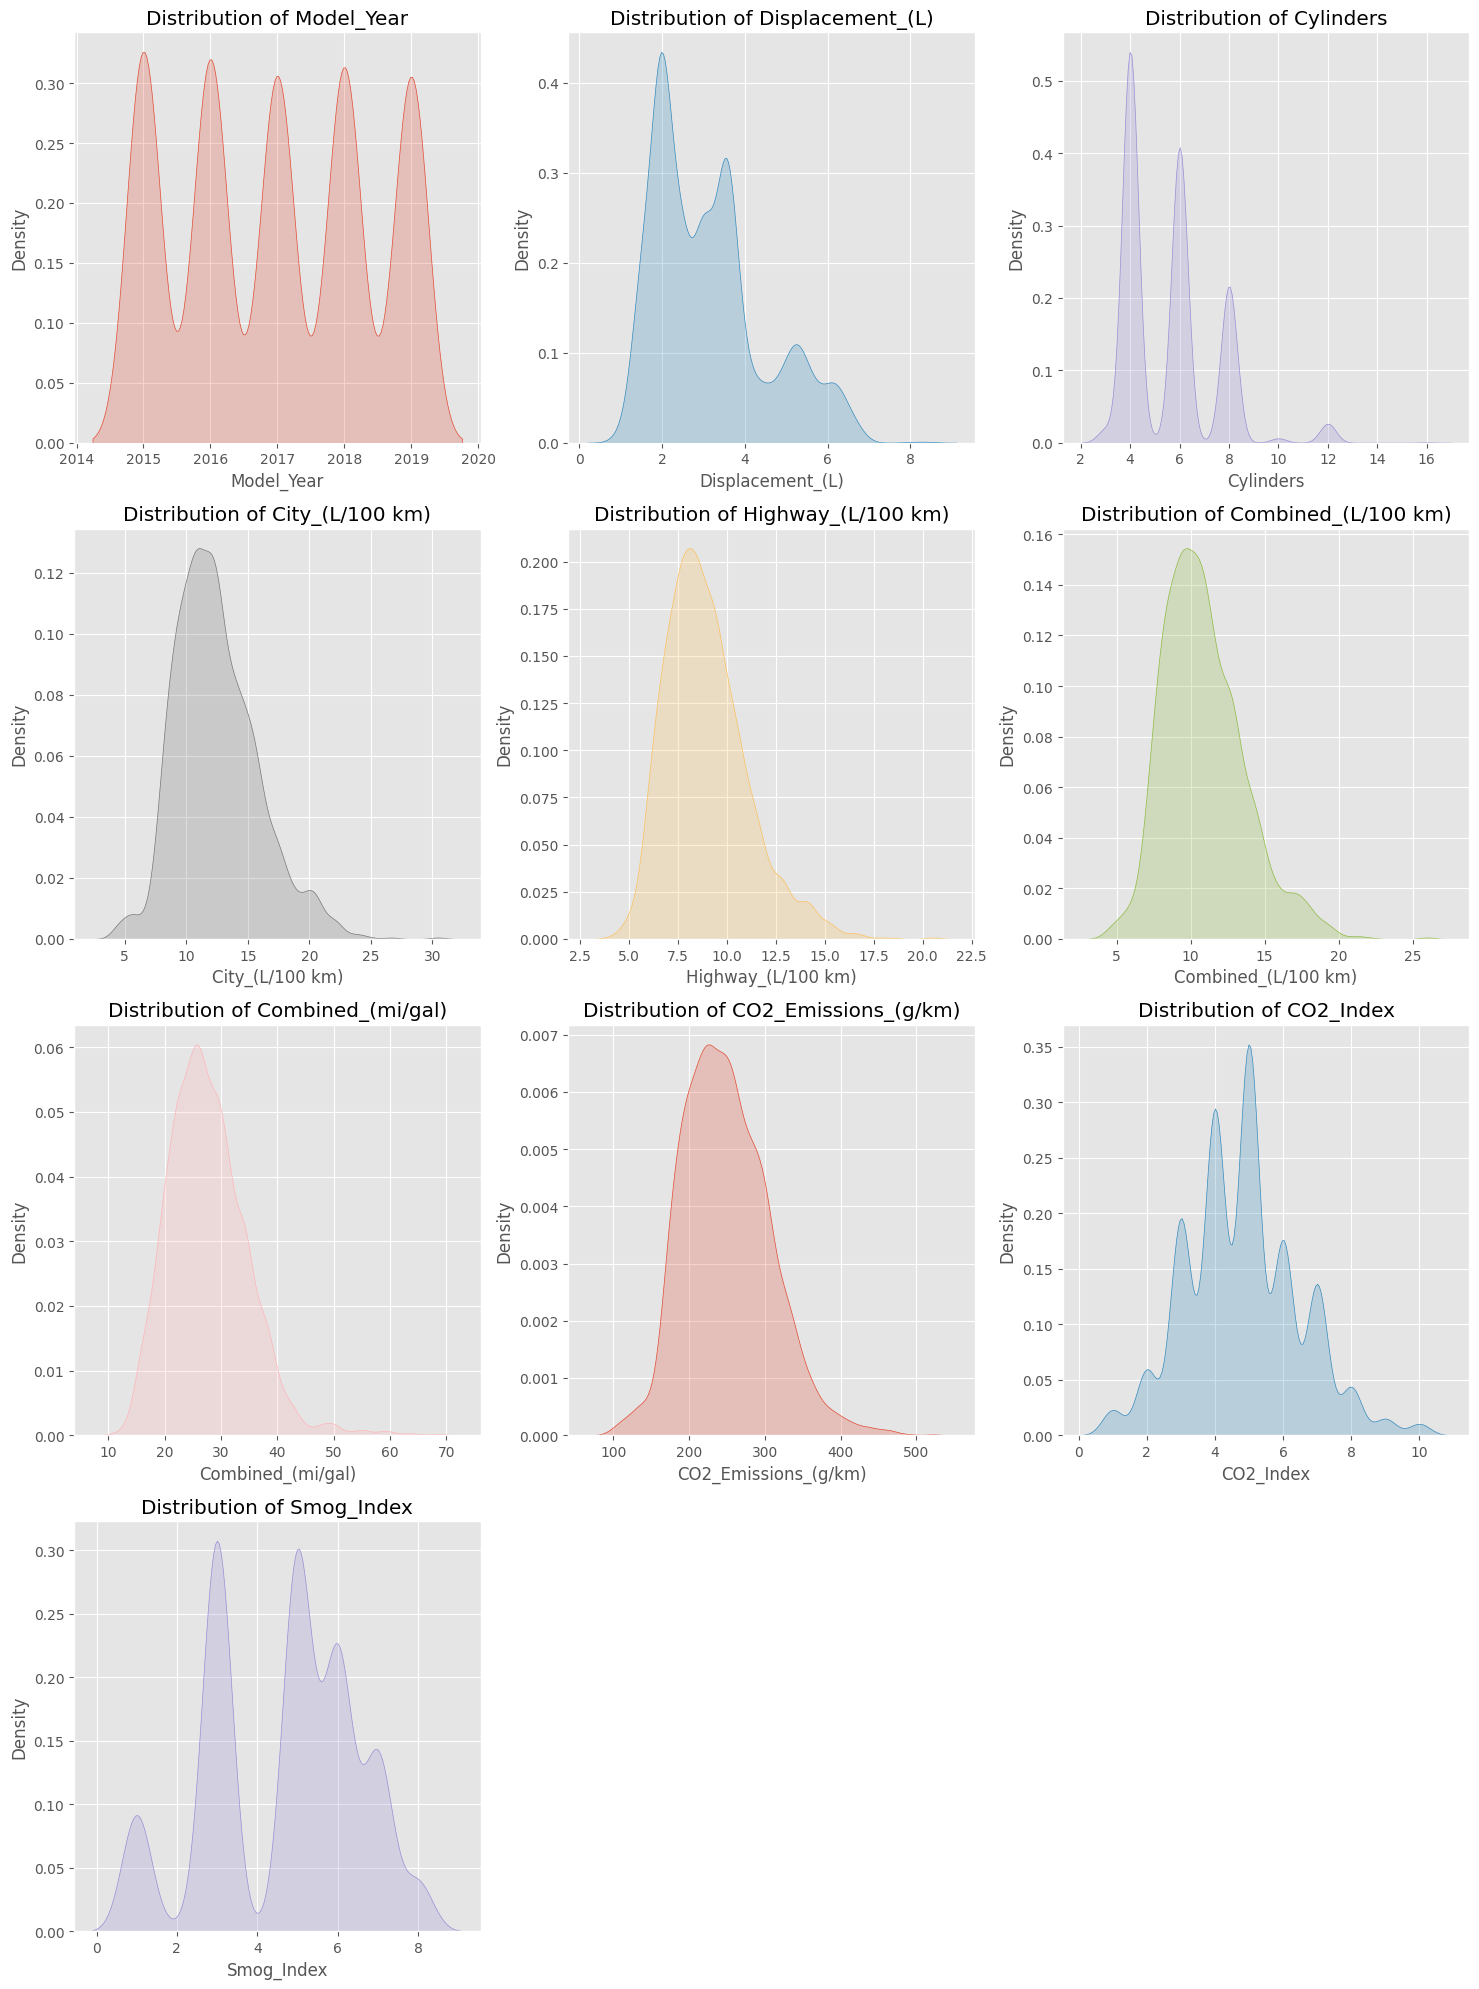

In [64]:
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

# Calculate number of rows needed
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / 3)

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plotting distribution for each numerical column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data[column], shade=True, color=f"C{i%10}", ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


'Model Year', 'Brand', 'Model', 'Vehicle Category', 'Displacement (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mi/gal)',
       'CO2 Emissions (g/km)'

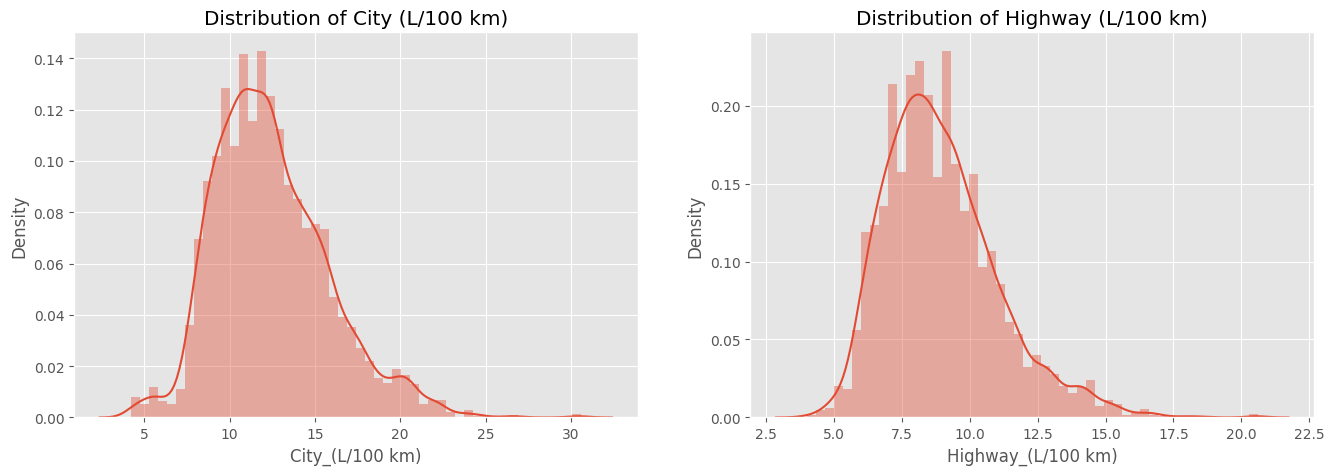

In [65]:
import warnings
warnings.filterwarnings('ignore')

# Set up the figure
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(data['City_(L/100 km)'])
plt.title('Distribution of City (L/100 km)')
plt.subplot(1, 2, 2)
sns.distplot(data['Highway_(L/100 km)'])
plt.title('Distribution of Highway (L/100 km)')
plt.show()

#### Check Outliers

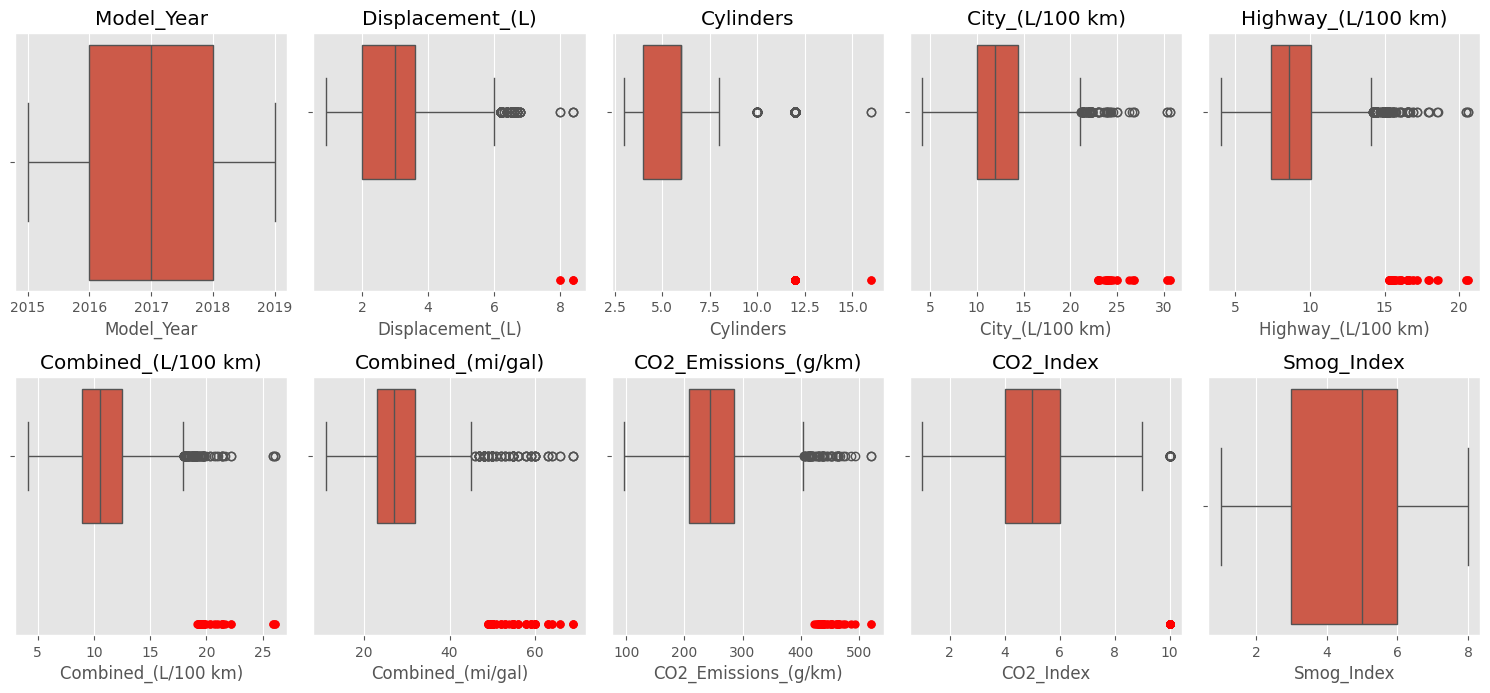

In [66]:
numerical_columns = train.select_dtypes(include=['int', 'float']).columns

# # Calculate the number of rows needed based on the number of numerical columns
# num_rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)

# # Set up the figure and subplots
# plt.figure(figsize=(18, 5 * num_rows))

# Set up the figure and subplots
plt.figure(figsize=(15, 10))

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=data[column], orient='v')
    plt.title(column)

    # Calculate upper and lower bounds for outliers
    mean = data[column].mean()
    std = data[column].std()
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std

    # Mark outliers
    outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
    plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)  # Mark outliers as red dots

plt.tight_layout()
plt.show()


#### Removing outliers

In [67]:
numerical_columns = train.select_dtypes(include=['int', 'float']).columns

# Create a copy of the original DataFrame
train_no_outliers = train.copy()

# Remove outliers from each numerical column (excluding 'Model_Year' and 'Smog_Index')
for column in numerical_columns:
    if column not in ['Model_Year', 'Smog_Index']:  # Skip specified columns
        mean = train[column].mean()
        std = train[column].std()
        upper_bound = mean + 3 * std  # Adjust the multiplier as needed
        lower_bound = mean - 3 * std  # Adjust the multiplier as needed

        # Filter out rows with values outside the bounds
        train_no_outliers = train_no_outliers[(train_no_outliers[column] <= upper_bound) & (train_no_outliers[column] >= lower_bound)]

# Print the shape of the original and modified DataFrames to see the difference
print("Original DataFrame shape:", train.shape)
print("DataFrame without outliers shape:", train_no_outliers.shape)


Original DataFrame shape: (4344, 15)
DataFrame without outliers shape: (3301, 15)


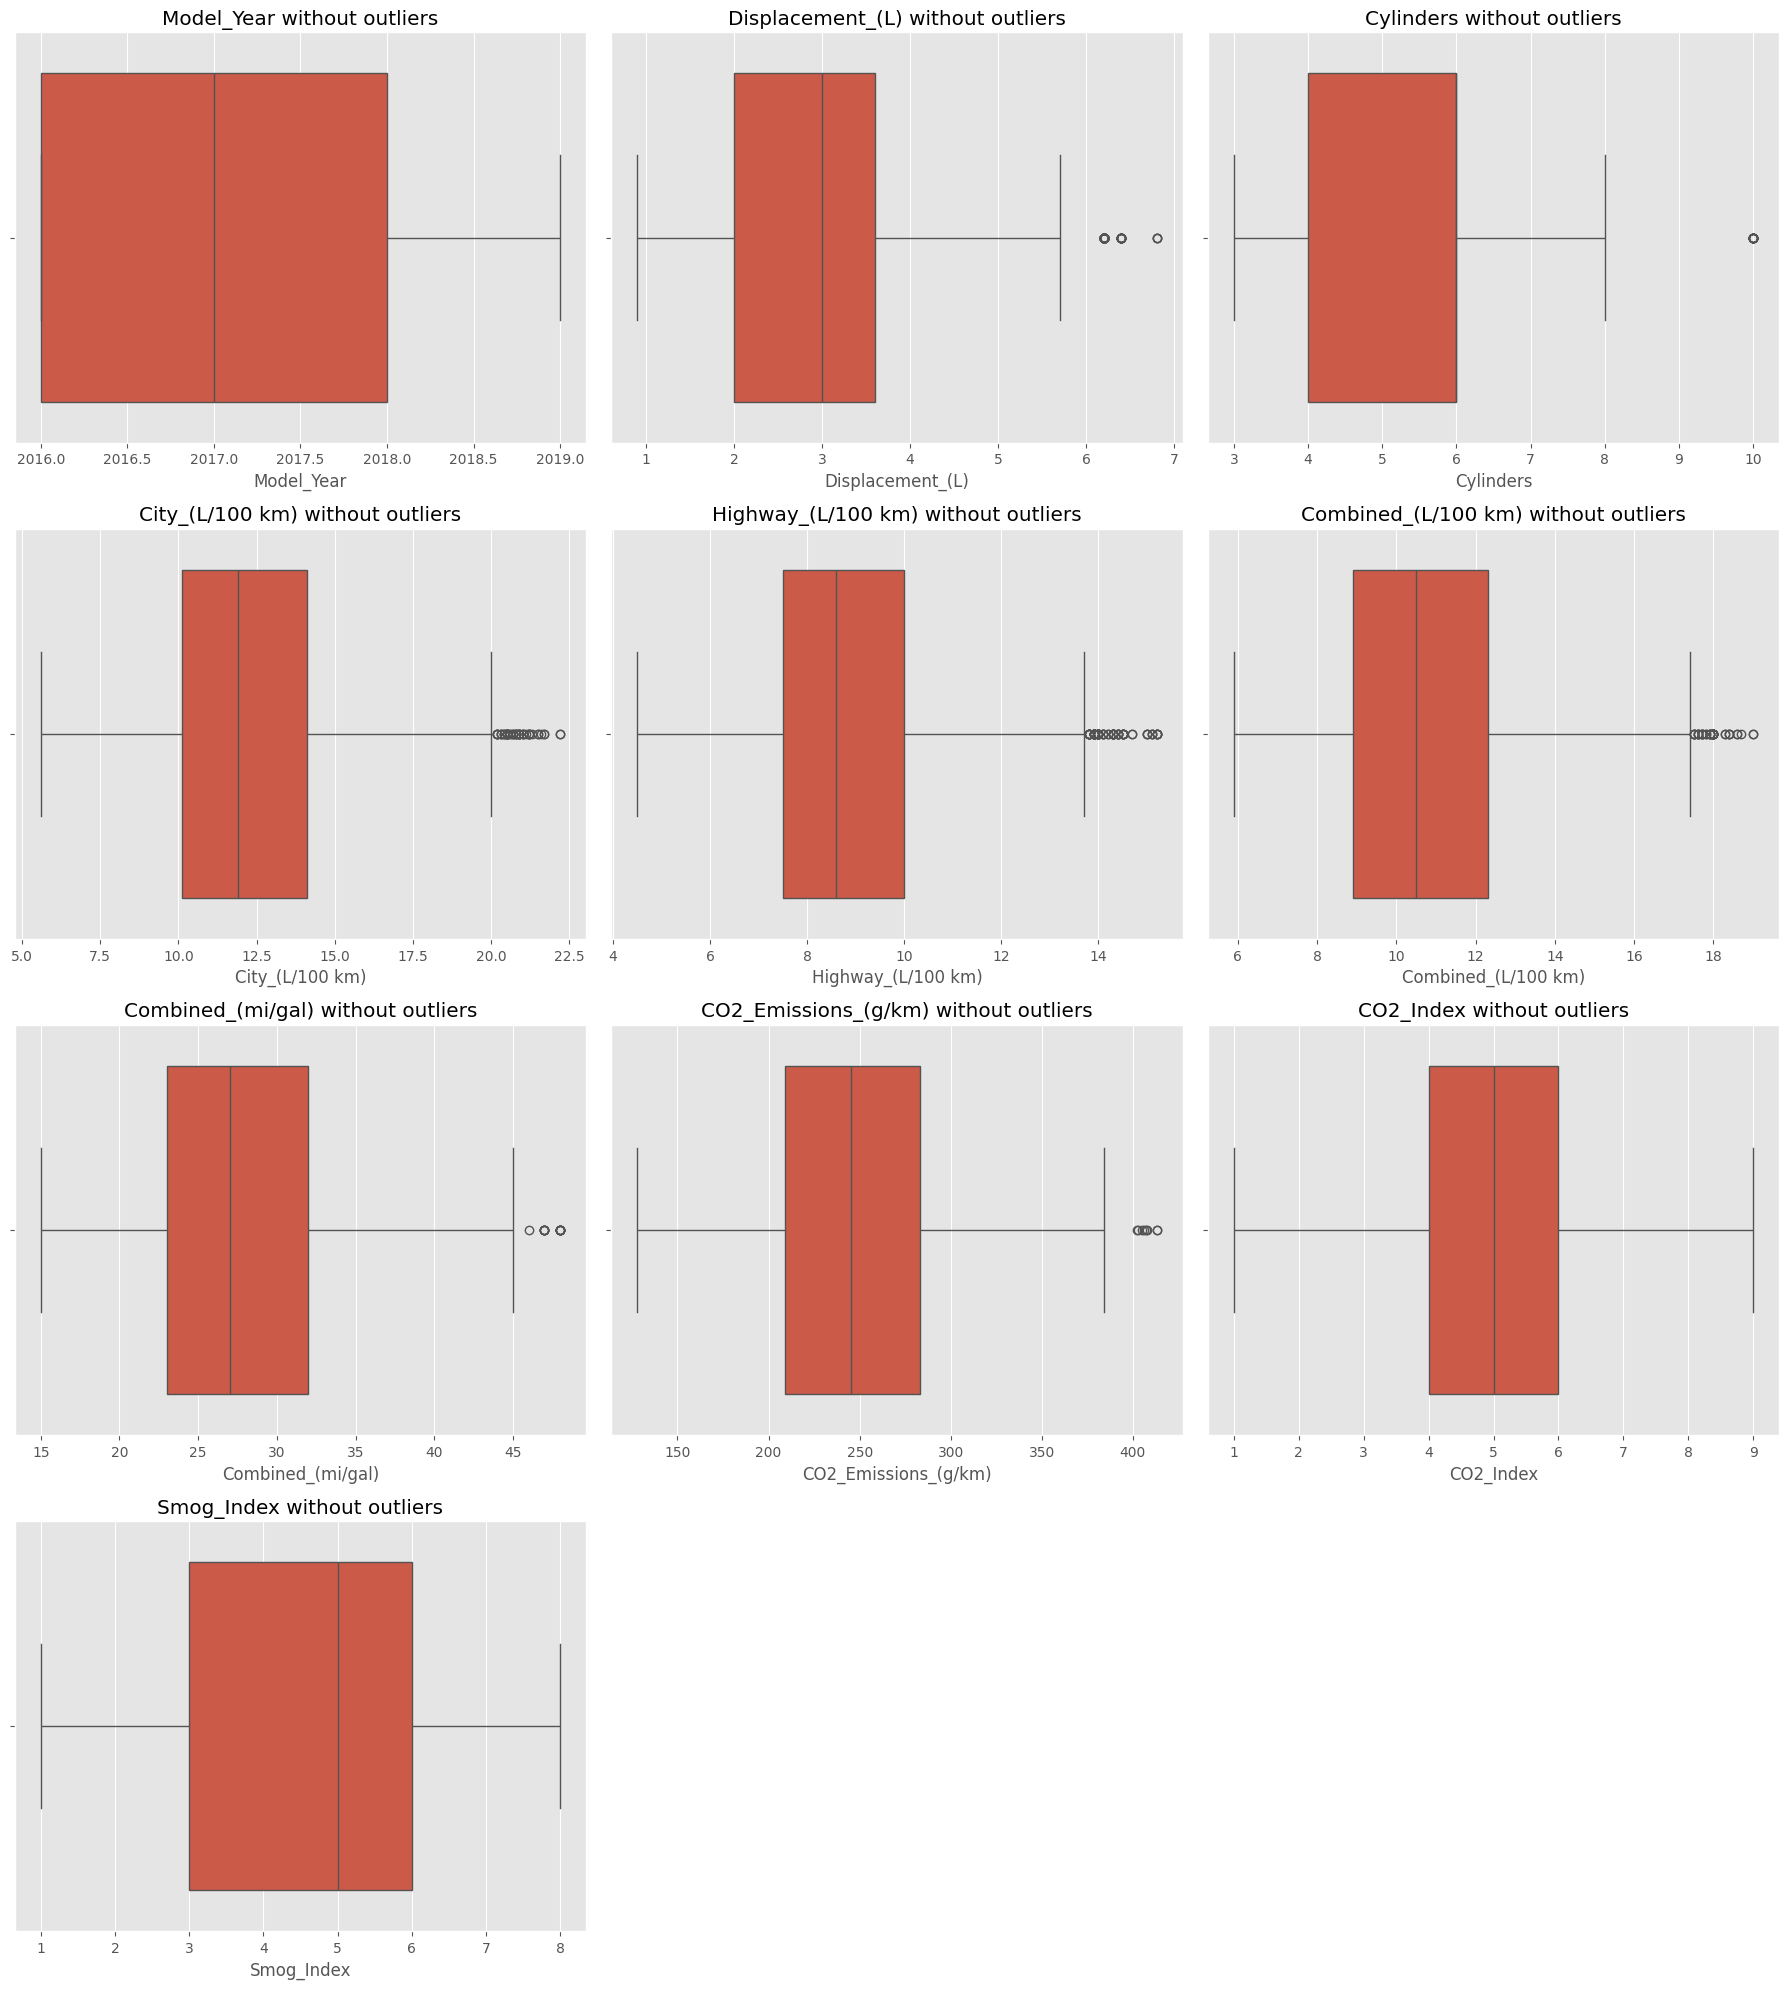

In [68]:
# Plot box plots for numerical columns without outliers
plt.figure(figsize=(18, 5 * num_rows))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=train_no_outliers[column], orient='v')
    plt.title(f"{column} without outliers")

plt.tight_layout()
plt.show()
